# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree

# Carregando a base
df = pd.read_csv("housing.csv")

# Verificando os tipos de dados
print(df.info())

# Verificando valores ausentes
print(df.isnull().sum())

# Dropando ou preenchendo valores ausentes se houver
df = df.dropna()

# Convertendo 'ocean_proximity' para variável numérica (necessário para scikit-learn)
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proxim

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

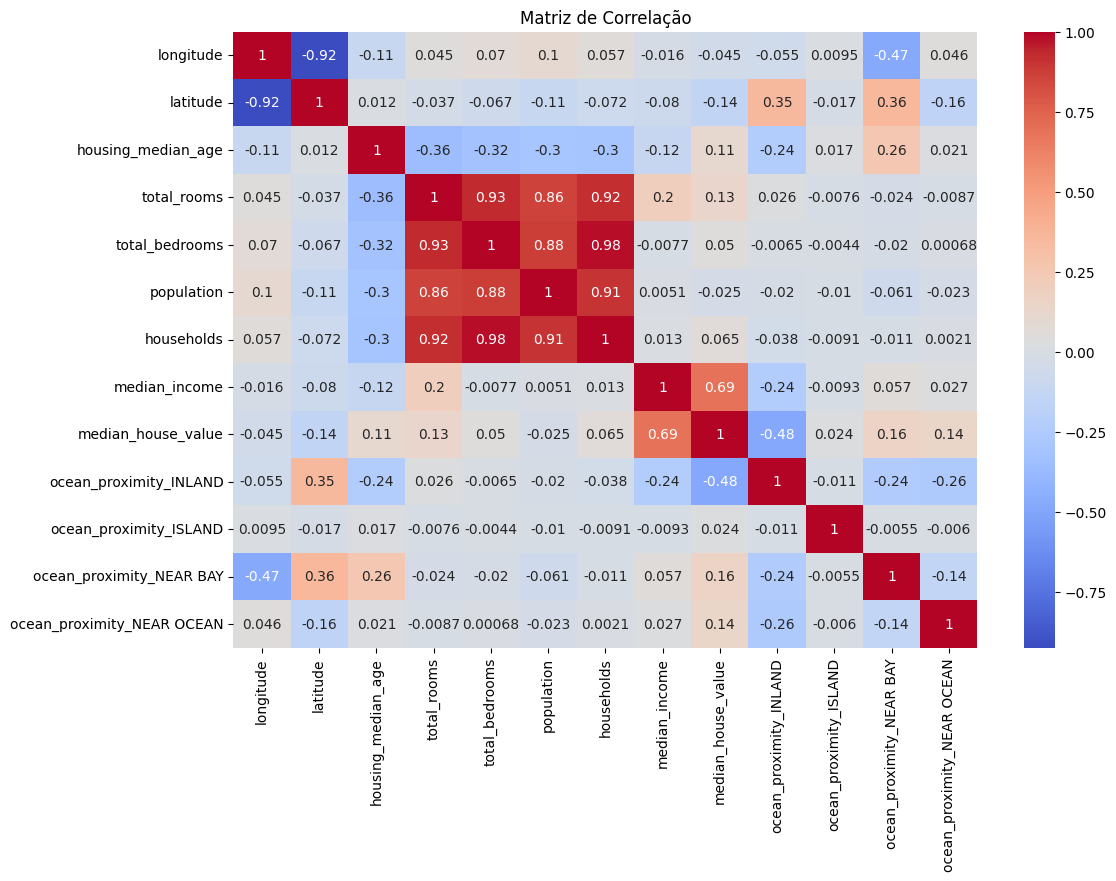

In [3]:
plt.figure(figsize=(12,8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()


### 3. Separe os dados em validação e teste

In [4]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [5]:
# Árvore com max_depth=8
tree1 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree1.fit(X_train, y_train)

# Árvore com max_depth=2
tree2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree2.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=2, random_state=42)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [6]:
# Previsões
y_pred_train_1 = tree1.predict(X_train)
y_pred_test_1 = tree1.predict(X_test)

y_pred_train_2 = tree2.predict(X_train)
y_pred_test_2 = tree2.predict(X_test)

# MSEs
mse_train_1 = mean_squared_error(y_train, y_pred_train_1)
mse_test_1 = mean_squared_error(y_test, y_pred_test_1)

mse_train_2 = mean_squared_error(y_train, y_pred_train_2)
mse_test_2 = mean_squared_error(y_test, y_pred_test_2)

print("Árvore Profundidade 8 - MSE Treino:", mse_train_1)
print("Árvore Profundidade 8 - MSE Teste :", mse_test_1)
print("Árvore Profundidade 2 - MSE Treino:", mse_train_2)
print("Árvore Profundidade 2 - MSE Teste :", mse_test_2)


Árvore Profundidade 8 - MSE Treino: 3201632810.128702
Árvore Profundidade 8 - MSE Teste : 4138506432.5857697
Árvore Profundidade 2 - MSE Treino: 6688828024.524753
Árvore Profundidade 2 - MSE Teste : 6916498324.432908


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

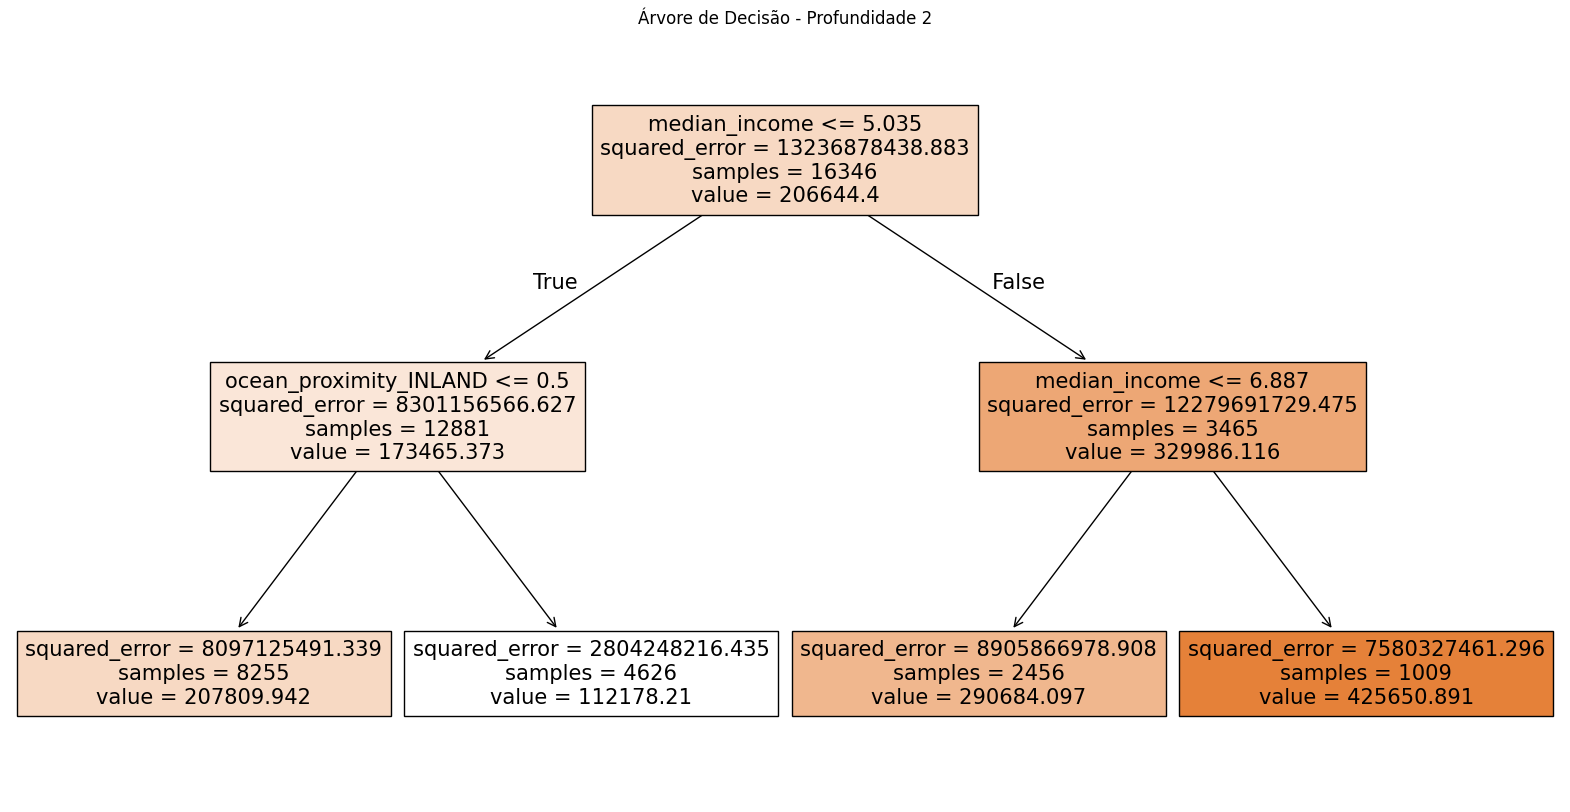

In [7]:
plt.figure(figsize=(20,10))
tree.plot_tree(tree2, filled=True, feature_names=X.columns)
plt.title("Árvore de Decisão - Profundidade 2")
plt.show()


### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

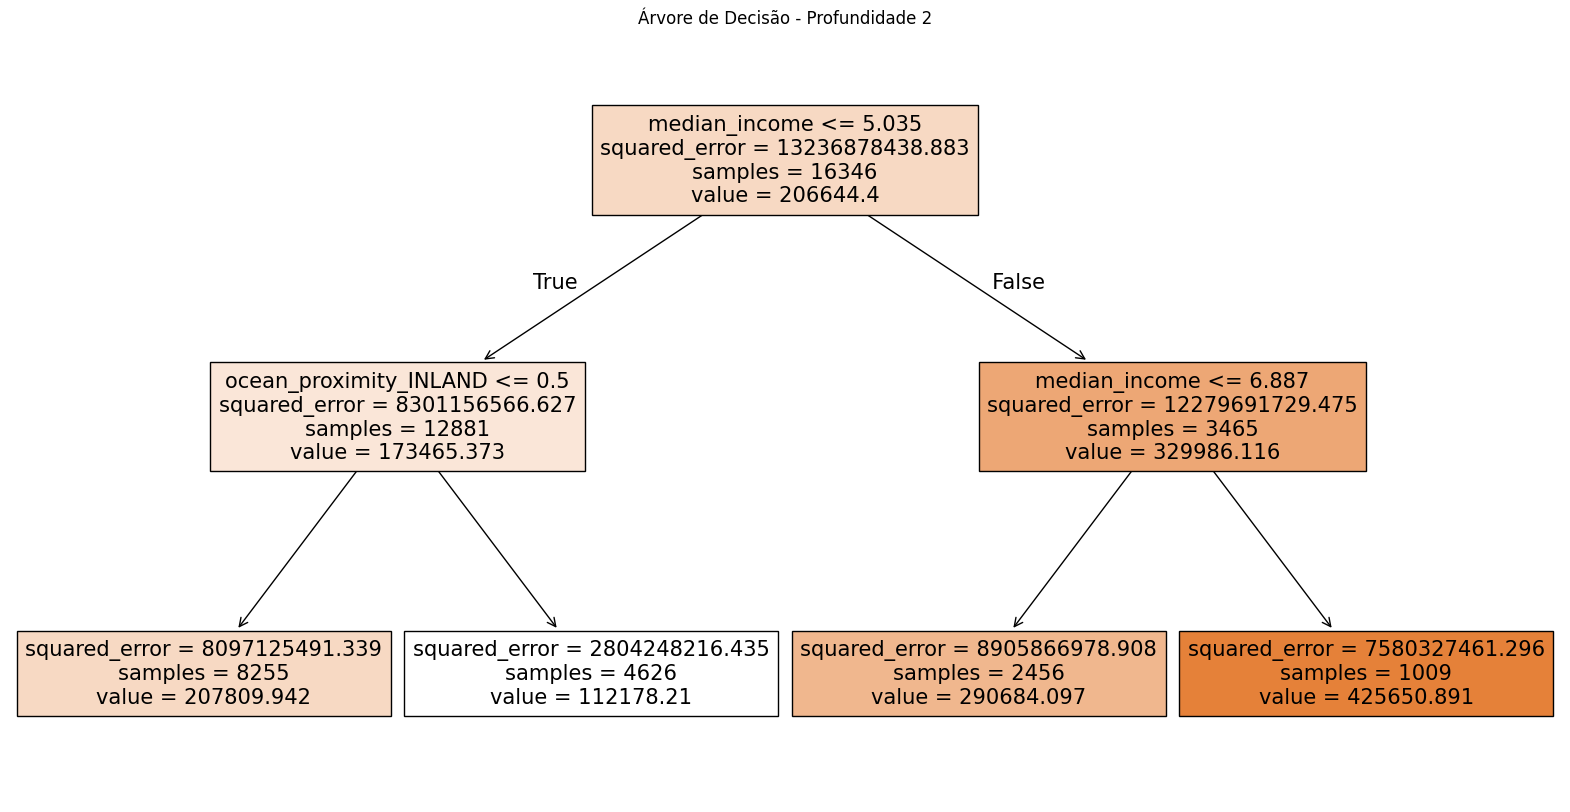

In [8]:
plt.figure(figsize=(20,10))
tree.plot_tree(tree2, filled=True, feature_names=X.columns)
plt.title("Árvore de Decisão - Profundidade 2")
plt.show()
